<a href="https://colab.research.google.com/github/GalaAldebara/PCVK_IqbalMakmur/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pengenalan Citra dan Visi Komputer (Thresholding)
## Nama : Muhammad Iqbal Makmur Al-Muniri
## Kelas : TI-3H
## No Absen : 16
## NIM : 2241720099

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pytesseract

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

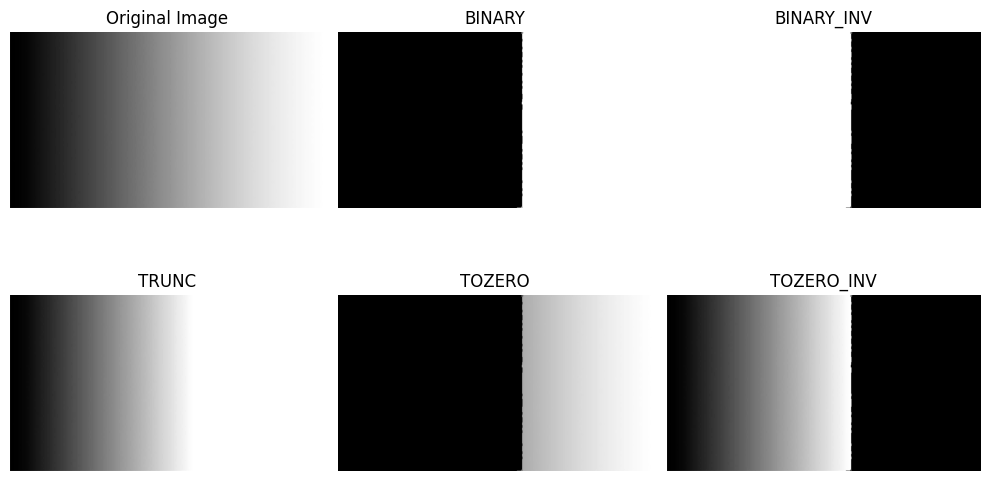

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image_thres/gradient.jpg', cv2.IMREAD_GRAYSCALE)


threshold_value = 170

_, binary = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY_INV)
_, trunc = cv2.threshold(image, threshold_value, 255, cv2.THRESH_TRUNC)
_, tozero = cv2.threshold(image, threshold_value, 255, cv2.THRESH_TOZERO)
_, tozero_inv = cv2.threshold(image, threshold_value, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


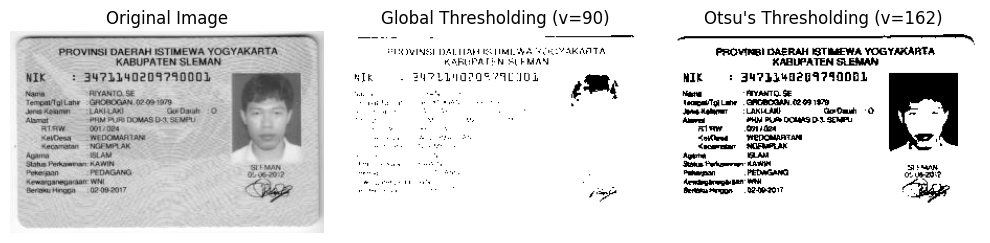

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image_thres/ktp-riyanto.jpg', cv2.IMREAD_GRAYSCALE)

global_threshold_value = 90
_, global_thresh = cv2.threshold(image, global_threshold_value, 255, cv2.THRESH_BINARY)

histogram, _ = np.histogram(image.ravel(), bins=256, range=(0, 256))
total_pixels = image.size

probabilities = histogram / total_pixels

current_max_variance = 0
optimal_threshold = 0
sum_total = np.dot(np.arange(256), probabilities)
sum_foreground = 0
weight_background = 0
weight_foreground = 0

for threshold in range(256):
    weight_background += probabilities[threshold]
    if weight_background == 0:
        continue
    weight_foreground = 1 - weight_background
    if weight_foreground == 0:
        break

    sum_foreground += threshold * probabilities[threshold]
    mean_background = sum_foreground / weight_background
    mean_foreground = (sum_total - sum_foreground) / weight_foreground

    between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

    if between_class_variance > current_max_variance:
        current_max_variance = between_class_variance
        optimal_threshold = threshold

_, otsu_thresh = cv2.threshold(image, optimal_threshold, 255, cv2.THRESH_BINARY)

titles = ['Original Image', f'Global Thresholding (v={global_threshold_value})', f'Otsu\'s Thresholding (v={optimal_threshold})']
images = [image, global_thresh, otsu_thresh]

plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


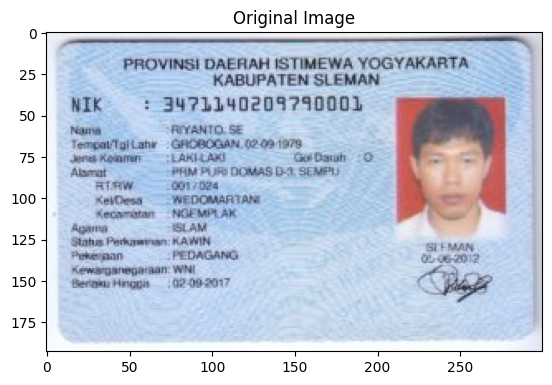

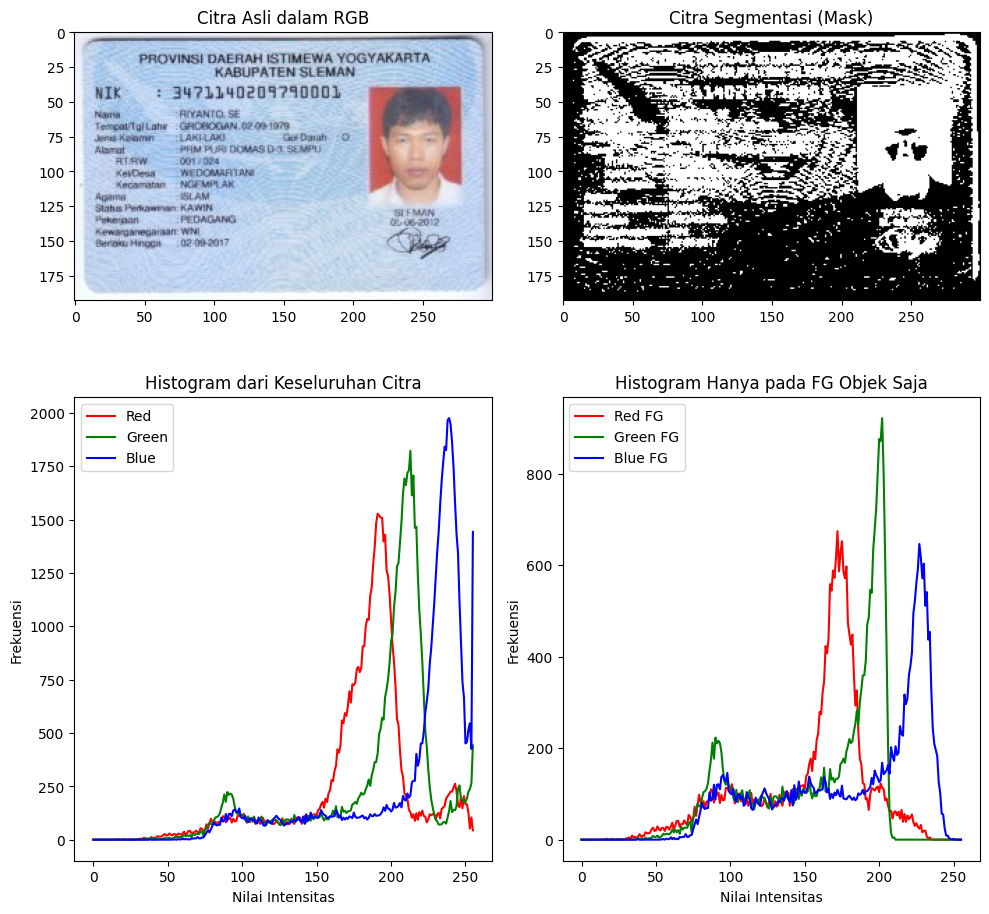

In [ ]:
import cv2 as cv

ktp_riyanto = cv.imread('/content/drive/MyDrive/image_thres/ktp-riyanto.jpg')
image_rgb = cv.cvtColor(ktp_riyanto, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()

gray_image = cv.cvtColor(ktp_riyanto, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(gray_image, 200, 255, cv.THRESH_BINARY)

mask = cv.bitwise_not(mask)

hist_total_b = cv.calcHist([ktp_riyanto], [0], None, [256], [0, 256])
hist_total_g = cv.calcHist([ktp_riyanto], [1], None, [256], [0, 256])
hist_total_r = cv.calcHist([ktp_riyanto], [2], None, [256], [0, 256])

hist_fg_r = cv.calcHist([image_rgb], [0], mask, [256], [0, 256])
hist_fg_g = cv.calcHist([image_rgb], [1], mask, [256], [0, 256])
hist_fg_b = cv.calcHist([image_rgb], [2], mask, [256], [0, 256])

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli dalam RGB')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segmentasi (Mask)')

plt.subplot(2, 2, 3)
plt.plot(hist_total_r, color='r', label='Red')
plt.plot(hist_total_g, color='g', label='Green')
plt.plot(hist_total_b, color='b', label='Blue')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r', label='Red FG')
plt.plot(hist_fg_g, color='g', label='Green FG')
plt.plot(hist_fg_b, color='b', label='Blue FG')
plt.title('Histogram Hanya pada FG Objek Saja')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

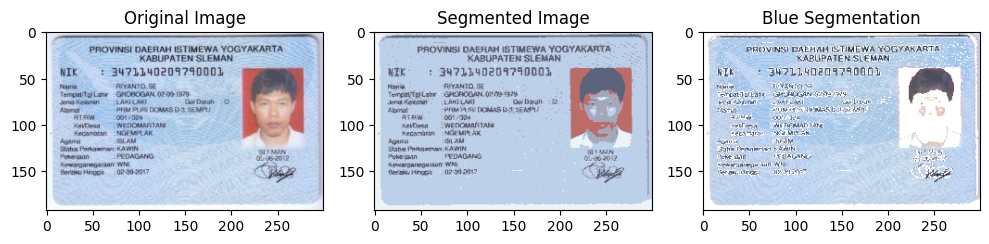

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/MyDrive/image_thres/ktp-riyanto.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('on')

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

k = 5
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

hsv_image = cv.cvtColor(segmented_image.astype(np.uint8), cv.COLOR_RGB2HSV)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

blue_mask = cv.inRange(hsv_image, lower_blue, upper_blue)

result = cv.bitwise_and(image, image, mask=blue_mask)

background = np.full(image.shape, 255, dtype=np.uint8)
result_with_white_bg = np.where(blue_mask[:, :, np.newaxis] == 255, result, background)

plt.subplot(1, 3, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(result_with_white_bg)
plt.title('Blue Segmentation')
plt.axis('on')

plt.tight_layout()
plt.show()


In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 2s (2,888 kB/s)
debconf: unable to ini

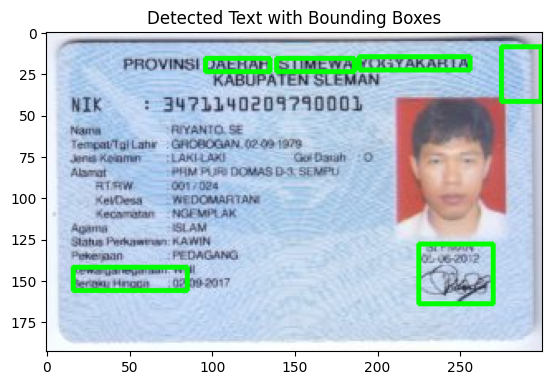

OCR Result:
‘PROVINS! DAERAH ISTIMEWA YOGYAKARTA

 

xaaieteN elas
wk = avna}uozoy7sonn3
ae wese

Seen

Shame
Pomme Peancan

|
ei



In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
from pytesseract import Output

# Path to the KTP image
image_path = '/content/drive/MyDrive/image_thres/ktp-riyanto.jpg'

# Load the image
image = cv2.imread(image_path)

# Convert image to RGB for display with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform OCR on the image using Tesseract
# Specify path to Tesseract executable if needed (uncomment and update path if required)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Use pytesseract to get bounding box data along with OCR results
detection_data = pytesseract.image_to_data(image, output_type=Output.DICT)

# Draw bounding boxes around detected text areas
n_boxes = len(detection_data['text'])
for i in range(n_boxes):
    if int(detection_data['conf'][i]) > 60:  # Confidence threshold
        (x, y, w, h) = (detection_data['left'][i], detection_data['top'][i], detection_data['width'][i], detection_data['height'][i])
        image_rgb = cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the original image with bounding boxes
fig, ax = plt.subplots()
ax.imshow(image_rgb)
ax.axis('on')
plt.title("Detected Text with Bounding Boxes")
plt.show()

ocr_text = pytesseract.image_to_string(image)
with open('/content/drive/MyDrive/image_thres/ocr_ktp_text.txt', 'w') as text_file:
    text_file.write(ocr_text)

print("OCR Result:")
print(ocr_text)


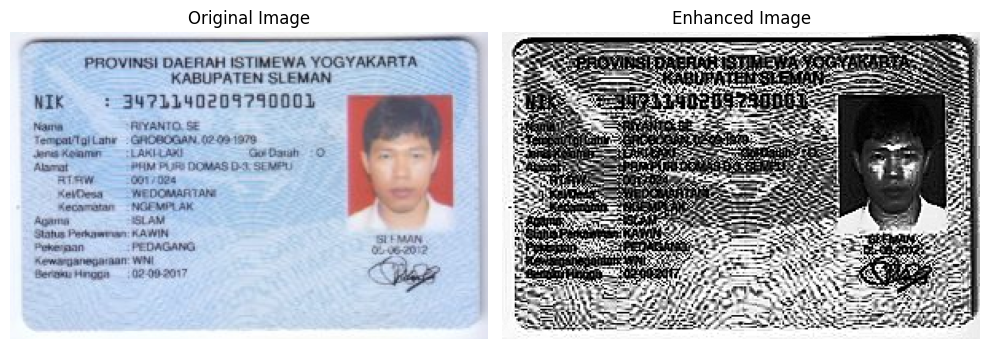

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/image_thres/ktp-riyanto.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization to enhance contrast
equalized_image = cv2.equalizeHist(gray_image)

# Sharpen the image
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(equalized_image, -1, kernel)

# Convert back to RGB for displaying with matplotlib
enhanced_image = cv2.cvtColor(sharpened_image, cv2.COLOR_GRAY2RGB)

# Display the original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Enhanced Image")
plt.axis('off')

plt.tight_layout()
plt.show()
